In [1]:
import os
import sys

def add_path():
    path = os.path.abspath(os.path.join(os.getcwd(), "../"))
    if path not in sys.path:
        sys.path.append(path)
    
    path = os.path.abspath(os.path.join(os.getcwd(), "../../"))
    if path not in sys.path:
        sys.path.append(path)

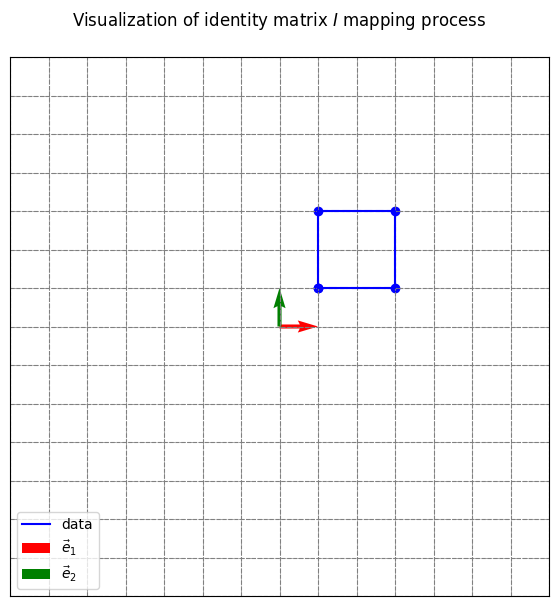

In [6]:
add_path()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from intuitive_understanding_of_linear_algebra.src import utils


standard_basis = np.array(
    [
        [1, 0], 
        [0, 1]
    ]
)

square = np.array(
    [
        [0, 2, 2, 0, 0], 
        [0, 0, 2, 2, 0]
    ]
)

square += 1

zero_matrix = np.eye(2)

fig, ax = plt.subplots(figsize=(7, 7))
lim = (-7, 7)

ax.set_aspect("equal")
ax.set_xlim(*lim)
ax.set_ylim(*lim)
ax.set_xticks([])
ax.set_yticks([])

utils.plot_full_custom_2d_grid(ax, standard_basis, lim, lim)

grid_lines = utils.plot_full_custom_2d_grid(ax, standard_basis, lim, lim, linewidth=0.8)
grid_geometries = [np.array(line.get_data()) for line in grid_lines]

original_square = ax.plot(square[0], square[1], "blue", linestyle="--", alpha=0.5)[0]
square_data = ax.plot(square[0], square[1], "blue", label="data")[0]
square_vertices = ax.scatter(square[0], square[1], color="blue")

e1 = ax.quiver(0, 0, standard_basis[0][0], standard_basis[0][1], angles="xy", scale_units="xy", scale=1, color="r", label="$\\vec{e}_1$")
e2 = ax.quiver(0, 0, standard_basis[1][0], standard_basis[1][1], angles="xy", scale_units="xy", scale=1, color="g", label="$\\vec{e}_2$")

ax.legend(loc="lower left")
ax.set_title("Visualization of identity matrix $I$ mapping process\n")

def update(frame):
    step = frame / 100
    each_transform_matrix = np.eye(2) * (1 - step) + zero_matrix * step
    transformed_square = each_transform_matrix @ square
    square_data.set_data(transformed_square[0], transformed_square[1])
    
    square_vertices.set_offsets(transformed_square.T)
    
    transformed_basis = each_transform_matrix @ standard_basis
    e1.set_UVC(transformed_basis[0][0], transformed_basis[1][0])
    e2.set_UVC(transformed_basis[0][1], transformed_basis[1][1])
    
    for grid_line, grid_geometry in zip(grid_lines, grid_geometries):
        transformed_line = each_transform_matrix @ grid_geometry
        grid_line.set_data(transformed_line[0], transformed_line[1])
        
    return (square_data, square_vertices, *grid_lines, e1, e2)

frames = np.arange(0, 101, 1)
ani = FuncAnimation(fig, update, frames=frames, blit=True)

html_str = ani.to_jshtml()
with open(os.path.join(os.getcwd(), "../animations/identity-matrix.html"), "w") as f:
    f.write(html_str)

HTML(html_str)